In [6]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

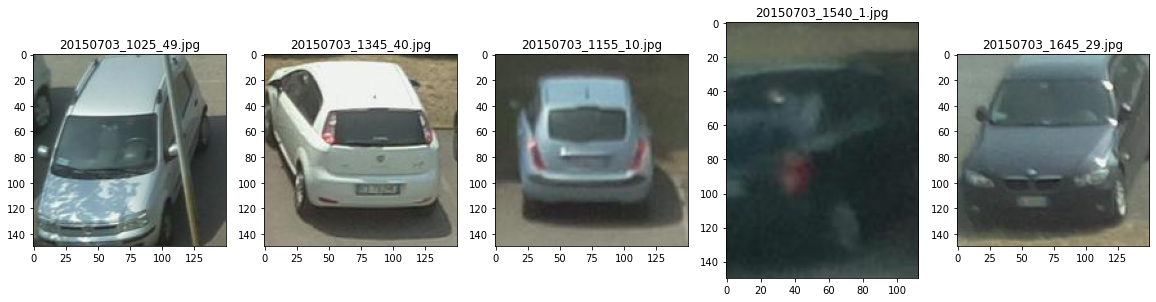

In [13]:
plt.figure(figsize=(20,20))
img_folder=r'D:\Project\cnr\A\busy'
for i in range(5):
    file = np.random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [64]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=mpimg.imread(image_path)

#             image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image, dtype='float32')
#             image = image.astype('float32')
            image /= 255. 
            img_data_array.append(image)
            class_name.append(0)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'D:\Project\cnr\A')

(6171,)
(6171,)


<ipython-input-66-2ce8a209f8ee>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xbusydata = np.array(img_data)


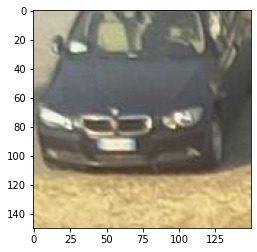

In [66]:
# target_dict={k: v for v, k in enumerate(np.unique(class_name))}
# # target_dict

xbusydata = np.array(img_data)
ybusydata = np.array(class_name)
print(xbusydata.shape)
print(ybusydata.shape)

plt.imshow(xbusydata[9])

In [67]:
np.concatenate((ybusydata,xbusydata),axis=0)
np.flatten((ybusydata,xbusydata)

SyntaxError: unexpected EOF while parsing (<ipython-input-67-acfc88f58c52>, line 2)

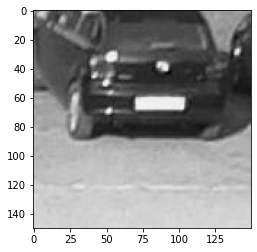

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "D:\Project\cnr\A"

CATEGORIES = ["busy", "free"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [133]:
print(img_array)
print(img_array.shape)

[[173 168 152 ... 177 179 179]
 [167 161 163 ... 172 166 162]
 [157 147 169 ... 157 142 133]
 ...
 [216 218 220 ... 219 220 220]
 [217 218 221 ... 220 220 221]
 [219 220 221 ... 223 224 224]]
(150, 150)


In [134]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████| 2550/2550 [00:02<00:00, 1238.73it/s]

6171


In [85]:
# import random

# random.shuffle(training_data)

1
1
1
1
1
1
1
1
1
1


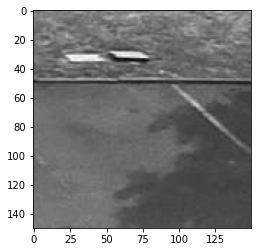

In [135]:
for sample in training_data[6080:6090]:
    print(sample[1])
    plt.imshow(sample[0], cmap='gray')

In [124]:
X = []
y = []
IMG_SIZE=150

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

[[[[173]
   [168]
   [152]
   ...
   [177]
   [179]
   [179]]

  [[167]
   [161]
   [163]
   ...
   [172]
   [166]
   [162]]

  [[157]
   [147]
   [169]
   ...
   [157]
   [142]
   [133]]

  ...

  [[216]
   [218]
   [220]
   ...
   [219]
   [220]
   [220]]

  [[217]
   [218]
   [221]
   ...
   [220]
   [220]
   [221]]

  [[219]
   [220]
   [221]
   ...
   [223]
   [224]
   [224]]]]


In [122]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [123]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)